Importing libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb

importing data

In [2]:
data = pd.read_csv('/content/Cust_Churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data = data.replace(' ', value=0)
data.TotalCharges = pd.to_numeric(data.TotalCharges)
data.TotalCharges.dtype

dtype('float64')

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

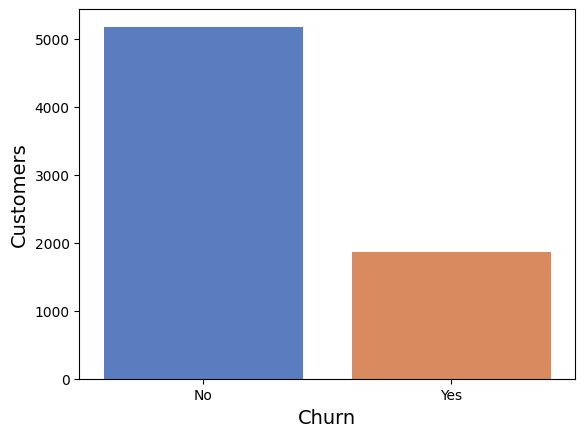

In [5]:
g = sns.countplot(x="Churn",data=data, palette="muted")
g.set_ylabel("Customers", fontsize=14)
g.set_xlabel("Churn", fontsize=14)

data.Churn.value_counts(normalize=True)

Preprocessing

In [6]:
data = data.drop('customerID', axis = 1)

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
catagorical = [i for i in data.columns if data[i].dtypes == 'object']

for i in catagorical:
    print(i, ':', data[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [9]:
data = data.replace(regex=r'No\s[a-z]+\sservice', value='No')
catagorical = [i for i in data.columns if data[i].dtypes == 'object']

for i in catagorical:
    if len(data[i].unique()) == 2:
        data[i] = data[i].map({'Male': 0, 'Female': 1, 'No': 0, 'Yes': 1})

In [10]:
catagorical = [i for i in data.columns if data[i].dtypes == 'object']

for i in catagorical:
    print(i, ':', data[i].unique())

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [11]:
data = pd.get_dummies(data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Fitting the model

In [12]:
y = data.Churn.values
x = data.drop('Churn', axis = 1).values

In [13]:
x = MinMaxScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=51)

In [14]:
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
xg=xgb.XGBClassifier()
sv=SVC(C = 10)

******************** RandomForestClassifier() ********************
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1300
           1       0.61      0.46      0.53       461

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1300
           1       0.64      0.51      0.57       461

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

_______________

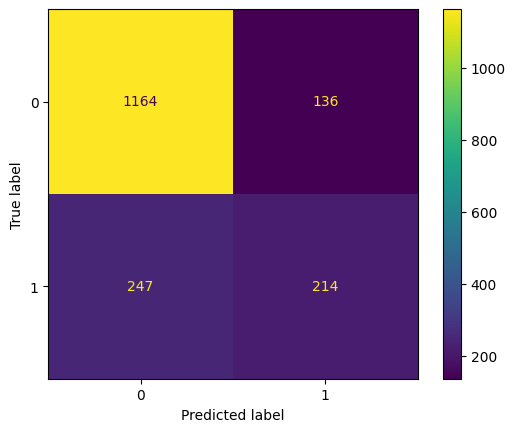

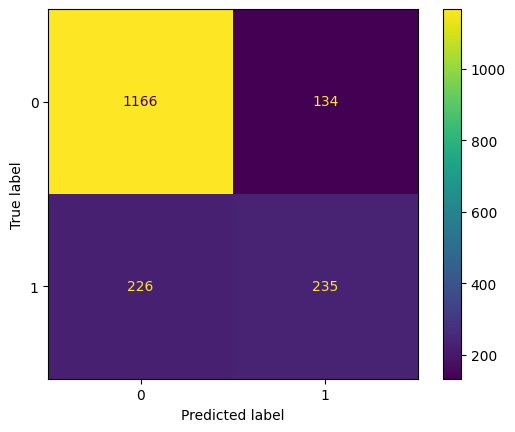

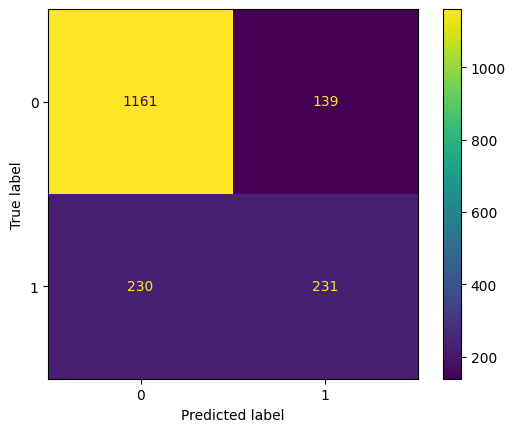

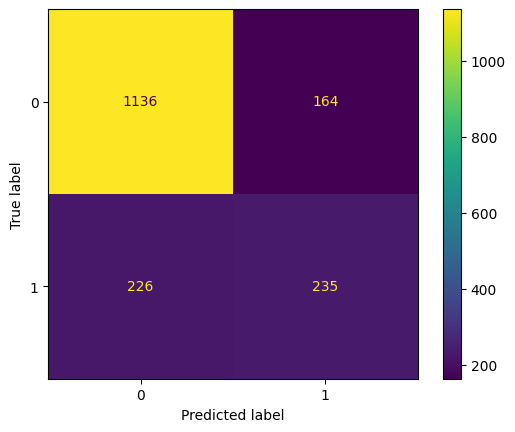

In [21]:
lst=[rf,ab,xg,sv]
for i in lst:
  print('*'*20,i,'*'*20)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*200)

Undersampling using SMOTE

In [22]:
x_smote, y_smote = SMOTE().fit_resample(x, y)

x_nearmiss, y_nearmiss = NearMiss(version=3).fit_resample(x, y)

******************** RandomForestClassifier() ********************
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1300
           1       0.89      1.00      0.94       461

    accuracy                           0.97      1761
   macro avg       0.94      0.98      0.96      1761
weighted avg       0.97      0.97      0.97      1761

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1300
           1       0.59      0.65      0.62       461

    accuracy                           0.79      1761
   macro avg       0.73      0.74      0.74      1761
weighted avg       0.80      0.79      0.79      1761

_______________

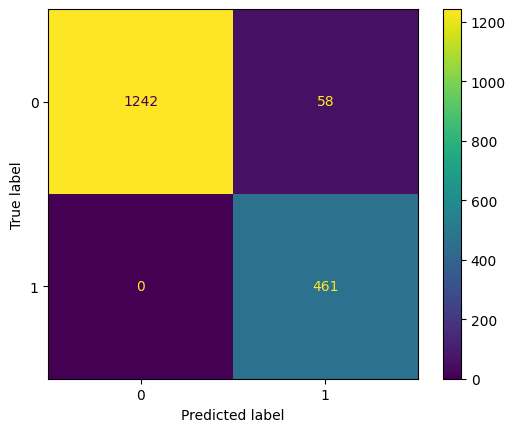

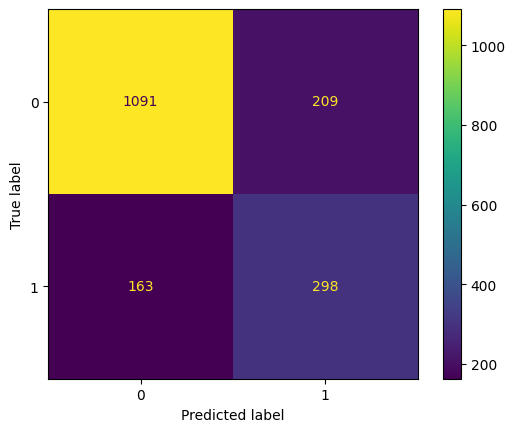

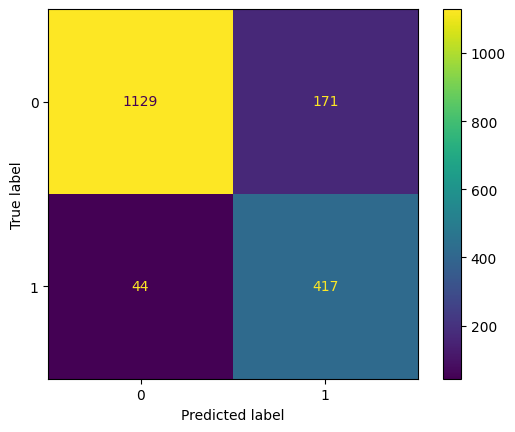

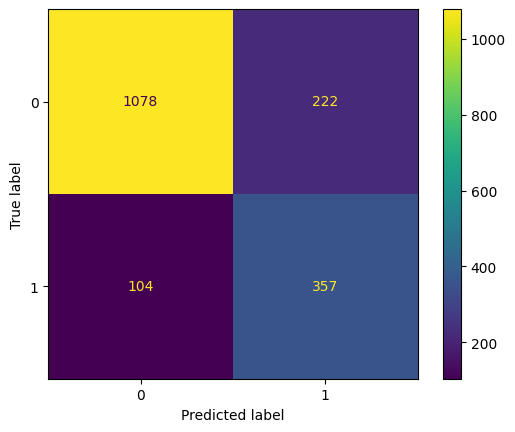

In [23]:
lst=[rf,ab,xg,sv]
for i in lst:
  print('*'*20,i,'*'*20)
  i.fit(x_nearmiss,y_nearmiss)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*200)